# F1 optimal Lap Time

In [1]:
# Put parent folder in the pythonpath
import sys,os,inspect

import matplotlib.pyplot as plt
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))))))
import fastest_lap
from fastest_lap import KMH

In [2]:
# Load vehicle
vehicle=fastest_lap.load_vehicle("../../../../database/limebeer-2014-f1.xml","car");

In [3]:
# Load track
track=fastest_lap.load_track("../../../../database/catalunya.xml","catalunya",1.0);

In [4]:
# Compute optimal laptime
data = fastest_lap.optimal_laptime(vehicle,track,12,500,["x","y","delta","throttle","u","s"]);
x = data[0];
y = data[1];
delta = data[2];
throttle = data[3];
u = data[4]
s = data[5]

## GPS

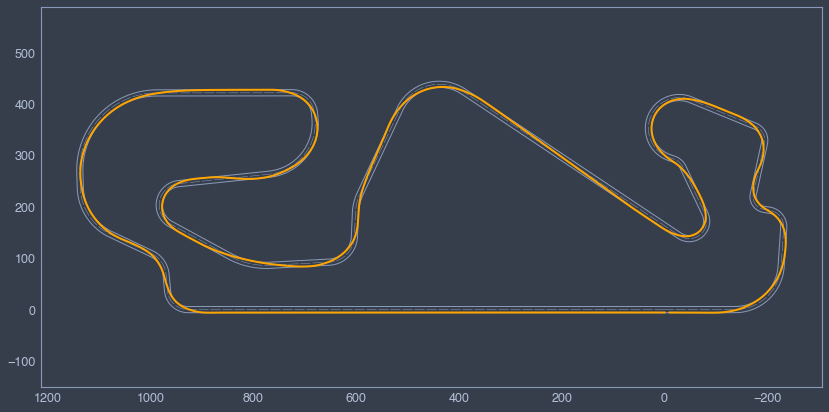

In [5]:
import numpy as np
fastest_lap.plot_optimal_laptime(np.array(x),y,track,6.0);
plt.gca().invert_xaxis()


## Steering

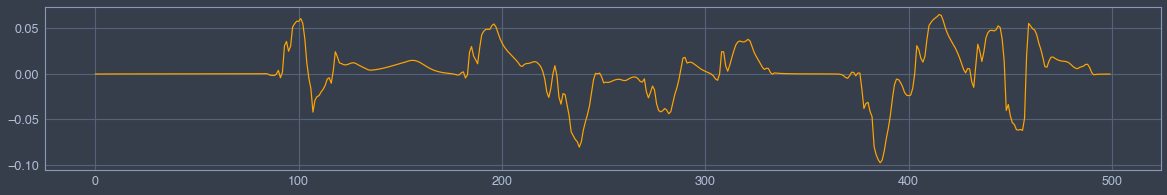

In [6]:
plt.figure(figsize=(20,3))
plt.plot(delta,color="orange");

## Torque

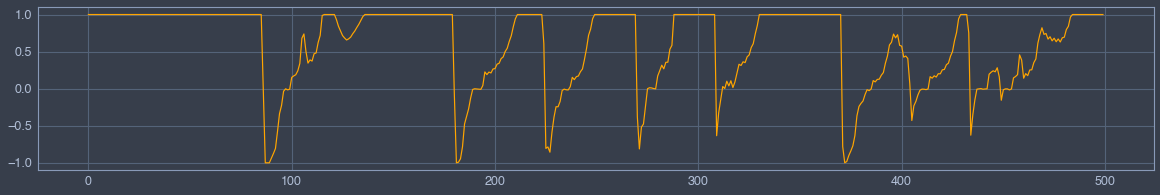

In [7]:
plt.figure(figsize=(20,3))
plt.plot(throttle,color="orange");

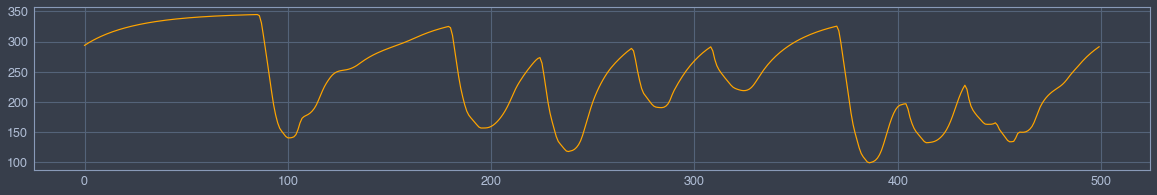

In [8]:
import numpy as np
plt.figure(figsize=(20,3))
plt.plot(np.array(u)*3.6,color="orange");

In [9]:

"""Overlaying speed traces of two laps
======================================
Compare two fastest laps by overlaying their speed traces.
"""


import matplotlib.pyplot as plt
import fastf1.plotting


fastf1.Cache.enable_cache('.')  # replace with your cache directory

# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl()

# load a session and its telemetry data
quali = fastf1.get_session(2021, 'Spanish Grand Prix', 'Q')
laps = quali.load_laps(with_telemetry=True)


##############################################################################
# First, we select the two laps that we want to compare

ver_lap = laps.pick_driver('VER').pick_fastest()
ham_lap = laps.pick_driver('HAM').pick_fastest()

##############################################################################
# Next we get the telemetry data for each lap. We also add a 'Distance' column
# to the telemetry dataframe as this makes it easier to compare the laps.

ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

##############################################################################
# Finally, we create a plot and plot both speed traces.
# We color the individual lines with the driver's team colors.

rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')


core           INFO 	Loading laps for Spanish Grand Prix - Qualifying [v2.1.11]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
utils          INFO 	NumExpr defaulting to 4 threads.
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['5', '99', '4', '3', '55', '47', '7', '10', '44', '11', '31', '18', '22', '77', '33', '16', '14', '6', '63', '9']


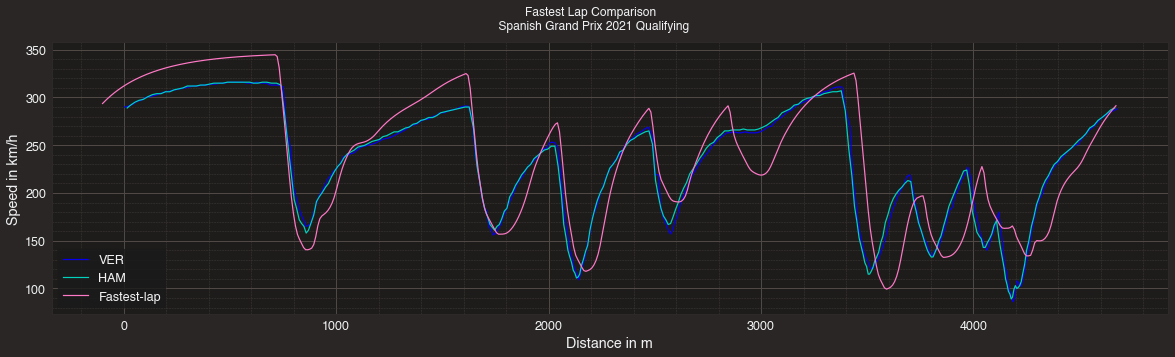

In [10]:

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='HAM')
ax.plot(np.array(s)-100,np.array(u)*3.6, label="Fastest-lap")
ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{quali.weekend.name} {quali.weekend.year} Qualifying")

plt.show()